In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
sys.path.insert(1,"./models/PyTorch_CIFAR10")
sys.path.insert(1,"./src")
#libraries
sys.path.insert(1, './lib/pytorch_cnn_visualizations/src/')

In [16]:
from cifar10_models import vgg
import torchvision.models as models
from torchvision import transforms
from Torchlurk import Lurk


In [17]:
import torchvision
from misc_funcs import clean_bw_imgs,sample_imagefolder,plot_hist,crop_imgs,rename_directories
import jdc


# ImageNet

At that stage, Download the tinyimagenet dataset on [this link](https://www.kaggle.com/ifigotin/imagenetmini-1000#n01440764_10470.JPEG) and place it in the directory data (s.t the path looks like `data/tinyimagenet/rest_of_path`

First we center-crop the images to the desired shape

In [7]:
crop_imgs("./bigdata/imagenet-mini/train/")

Progression:2.70%


KeyboardInterrupt: 

Once the dataset is downloaded, we need to get rid of a few buggy bw images: 

In [142]:
clean_bw_imgs("./bigdata/imagenet-mini/train/")

Progression:100.00%
BW files found:
../data/imagenet-mini/train/n03920288/n03920288_3315.JPEG
../data/imagenet-mini/train/n03920288/n03920288_3629.JPEG
../data/imagenet-mini/train/n03942813/n03942813_1800.JPEG
../data/imagenet-mini/train/n02791270/n02791270_16505.JPEG
../data/imagenet-mini/train/n02791270/n02791270_23048.JPEG
../data/imagenet-mini/train/n02950826/n02950826_11905.JPEG
../data/imagenet-mini/train/n02950826/n02950826_13787.JPEG
../data/imagenet-mini/train/n02894605/n02894605_26115.JPEG
../data/imagenet-mini/train/n03782006/n03782006_37777.JPEG
../data/imagenet-mini/train/n04041544/n04041544_1401.JPEG
../data/imagenet-mini/train/n02403003/n02403003_656.JPEG
../data/imagenet-mini/train/n02109047/n02109047_1579.JPEG
../data/imagenet-mini/train/n02109047/n02109047_6125.JPEG
../data/imagenet-mini/train/n02787622/n02787622_5870.JPEG
../data/imagenet-mini/train/n02787622/n02787622_9908.JPEG
../data/imagenet-mini/train/n02102480/n02102480_6584.JPEG
../data/imagenet-mini/train/n03

You might want to work on a subset of tinyimagenet for computations reason.

In [25]:
sample_imagefolder("bigdata/imagenet-mini/train/","static/data/imagenet10classes/images",num_dir=20,img_num_per_dir=5)

Progression:95.00%
Sampling terminated.


In [18]:
infos = pd.read_csv("./bigdata/imagenet-mini/labels_imagenet.txt",sep=" ",header=None)
dic = infos.set_index(0)[1].to_dict()
rename_directories('./data/imagenet10classes/images',dic)

NameError: name 'pd' is not defined

In [19]:
model = models.vgg16(pretrained=True)
# same preprocess used as vgg16
preprocess = transforms.Compose([
    transforms.CenterCrop(224), 
    transforms.ToTensor()
    ,transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Run this cell if you want to create the information for the first time.

In [23]:
#watch out: once you chose a folder name for the computed images and a json name, the json name will point to that folder name exclusively.
lurker = Lurk(model,
              preprocess,
              save_gen_imgs_dir='./results/vgg16_imagenet/',
              save_json_path='./saved_model/vgg16_imagenet.json',
              imgs_src_dir="./data/imagenet10classes/images/",
              side_size=224)

json saving done!


How to serve the website

In [16]:
lurker.serve(3000)

Start!
 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:3000/ (Press CTRL+C to quit)
127.0.0.1 - - [14/May/2020 11:47:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:20] "GET /saved_model/.current.json?_=1589449640417 HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:20] "GET /saved_model/vgg16_imagenet.json?_=1589449640418 HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:20] "GET /saved_model/vgg16_imagenet.json?_=1589449640420 HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:20] "GET /saved_model/vgg16_imagenet.json?_=1589449640419 HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:20] "GET /static/data/numb.png HTTP/1.1" 404 -
127.0.0.1 - - [14/May/2020 11:47:24] "GET /saved_model/vgg16_imagenet.json?_=1589449640421 HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:28] "GET /saved_model/vgg16_imagenet.json?_=1589449640422 HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2020 11:47:31] "GET /saved_model/.current.json?_=1589449651840 HTTP/1.1" 200 -
127.0

In [17]:
lurker.end_serve()

How to save/load the lurker in a convenient manner.. \[OPTIONNAL\]

In [21]:
lurker.save_to_dill("./generated/vgg16_imagenet.pickle")

dill saving done!


In [24]:
lurker = Lurk.load_from_dill("./generated/vgg16_imagenet.pickle")

Loading done!


## Computations

We compute the average/maximum activation images from the train set:

In [25]:
lurker.compute_top_imgs()

json saving done!


And plot the "most activating" classes w.r.t a metric(max or avg) for a given filter

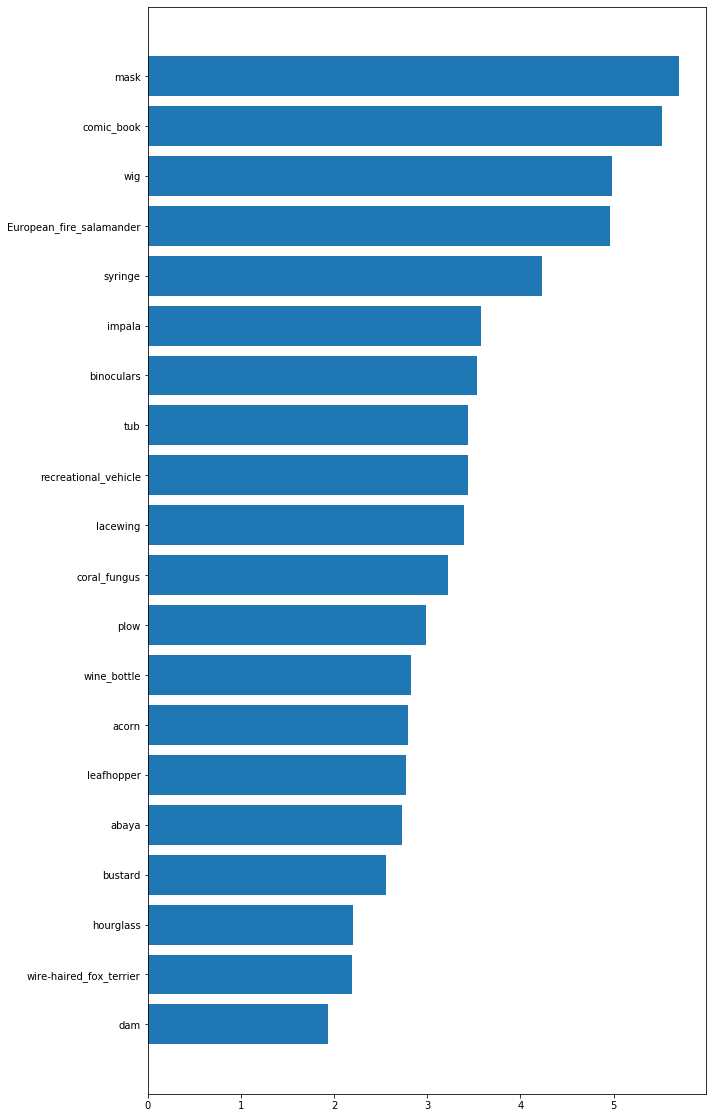

In [26]:
lurker.plot_hist(0,0,"max")

Possibility to compute the layer visualization:

In [28]:
lurker.compute_layer_viz(layer_indx = 0,filter_indexes=[12,7])

Filter 1 / 1
Vis saved!
json saving done!
Visualization done!
json saving done!


And the respective gradients w.r.t the most activating images

In [29]:
lurker.compute_grads()

Grads Progression:layer1/1 100.0%


If you wish to load a precomputed json, just add the `load_path` attribute. Watch out, it needs to be coherent with the folder name.\[OPTIONNAL\]

In [30]:
lurker3 = Lurk(model,
               preprocess,
               save_gen_imgs_dir='./results/trash/',
               save_json_path='./saved_model/new_vgg16.json',
               imgs_src_dir="./data/imagenet10classes/images",
               load_json_path='./saved_model/vgg16_imagenet.json',
               side_size=224)

Loading done!


# Places365

Download of the images possible on http://places2.csail.mit.edu/download.html

In [37]:
sample_imagefolder("./bigdata/Places365/val/","./data/places365/images",num_dir=365,img_num_per_dir=5)

Progression:99.73%
Sampling terminated.


In [ ]:
create_labels(places_dataset.class_to_idx,"./data/places365/")

In [13]:
alex_places = get_alex_places()

In [14]:
places_preprocess = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [15]:
lurker_alex_places = Lurk(alex_places
                          ,places_preprocess
                          ,save_gen_imgs_dir='./results/alex_places/'
                          ,save_json_path='saved_model/alex_places.json'
                          ,imgs_src_dir="./data/places365/images/"
                          ,side_size=224)

json saving done!


In [20]:
lurker_alex_places.serve()

In [24]:
lurker_alex_places.end_serve()

In [17]:
lurker_alex_places.compute_top_imgs()

KeyboardInterrupt: 

In [22]:
lurker_alex_places.compute_layer_viz(layer_indx = 0,filter_indexes=[1,3])

Filter 1 / 2
Vis saved!
json saving done!
Filter 2 / 2
Vis saved!
json saving done!
Visualization done!
json saving done!


In [23]:
lurker_alex_places.compute_grads()

Grads Progression:layer1/1 100.0%


# Cifar10

In [143]:
#download the big dataset
cifar_dataset = torchvision.datasets.CIFAR10("./bigdata/CIFAR10_dataset", train=True, transform=None, target_transform=None, download=True)

Files already downloaded and verified


In [144]:
# takes ~ 5min
#convert_to_jpg_dirs(cifar_dataset,"./bigdata/CIFAR10")

Progression:100.00 %


In [181]:
sample_imagefolder("./bigdata/CIFAR10/","./data/CIFAR10/images",num_dir=10,img_num_per_dir=10)

Progression:90.00%
Sampling terminated.


In [182]:
create_labels(cifar_dataset.class_to_idx,"./data/CIFAR10/labels_cifar.txt")

In [183]:
preprocess_cif = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
model_cif = vgg.vgg11_bn(pretrained=True)

In [184]:
lurker_cif = Lurk(model_cif,
                  preprocess_cif,
                  save_gen_imgs_dir='./results/cifar/',
                  save_json_path='./saved_model/cifar.json',
                  imgs_src_dir="./data/CIFAR10/images/",
                  side_size=32)

In [189]:
lurker_cif.compute_top_imgs()

lurker_cif.plot_hist(0,0,"max")

lurker_cif.compute_layer_viz(layer_indx = 0,filter_indexes=[6,7])

lurker_cif.compute_grads()